## Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_data.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [3]:
# column descriptions: 

# cp : chest pain
# restecg :  resting EKG results
# exang : exercise-induced angina
# slope : the slope of the ST segment of peak exercise
# ca : number of major vessels (0-3) stained by fluoroscopy
# thal : thalium stress result 
# trestbps : resting blood pressure
# chol : cholesterol
# thalach : maximum heart rate achieved
# oldpeak: the old peak of exercise-induced ST 

pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<AxesSubplot:>

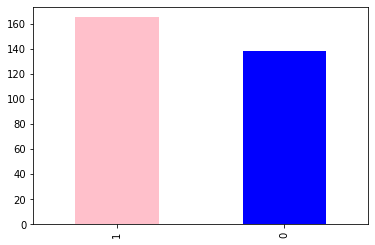

In [7]:
df.target.value_counts().plot(kind = "bar", color = ["pink", "blue"])

In [8]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# no null values, so we can continue to our analysis.

categorical_values = []
continous_values = []

for column in df.columns:
    print("-------------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_values.append(column)
    else :
        continous_values.append(column)
    
    

-------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
-------------------------
sex : [1 0]
-------------------------
cp : [3 2 1 0]
-------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
-------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 18

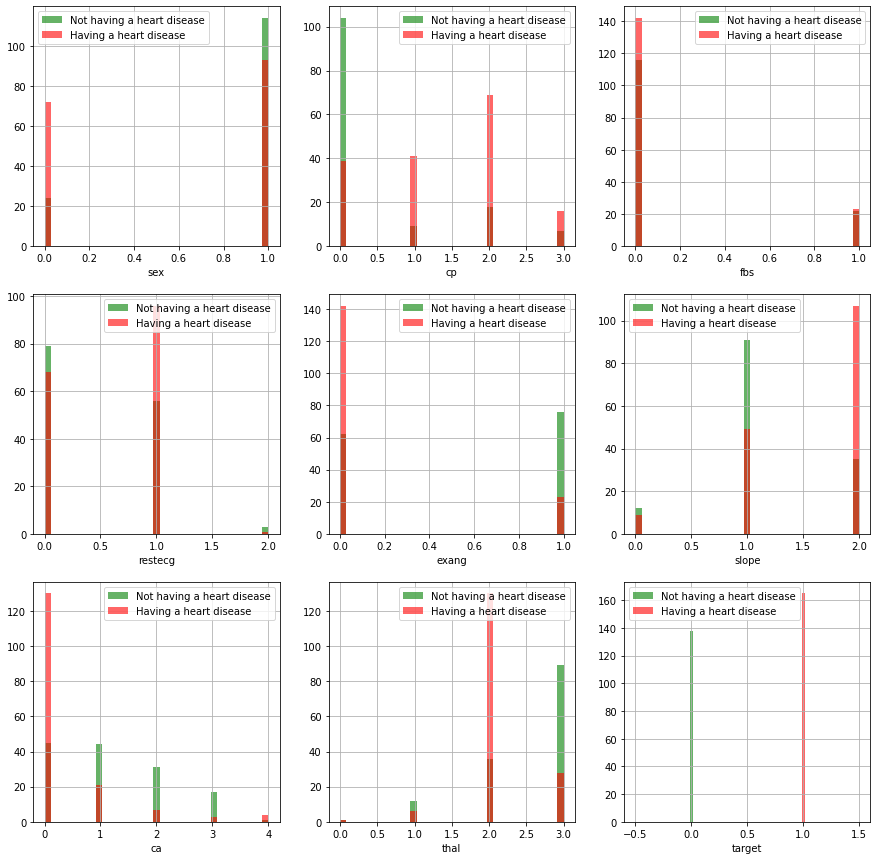

In [18]:
plt.figure(figsize = (15,15))

for i,column in enumerate(categorical_values,1):
    plt.subplot(3,3,i) # 3x3 9 tane categorical column bulunuyor.
    df[df["target"] == 0][column].hist(bins = 35, color = 'green', label = 'Not having a heart disease', 
                                       alpha = 0.6)
    df[df["target"] == 1][column].hist(bins = 35, color = 'red', label = 'Having a heart disease', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)
    

### Observations:

We need to explore these graphics and get some insights.

1. People who have chest pain 1,2,3 are more likely to have heart disease than 0.
2. People with value 1 of resting EKG results (restecg) (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems)) are more likely to have heart diseases.
3. People with value 0 of exercise-induced angina (exang) are more likely to have heart diseases than value 1.
4. People with value 2(Downslopins: signs of an unhealthy heart) of slope (the slope of the ST segment of peak exercise) are more likely to have heart disease than 0 and 1.
5. People with value 0 of CA (number of major vessels (0-3) stained by fluoroscopy) are more likely have a heart disease than others.
6. People with value 2(defect corrected: once was a defect but ok now) of thalium stress result (thal) are more likely to have heart disease than others.



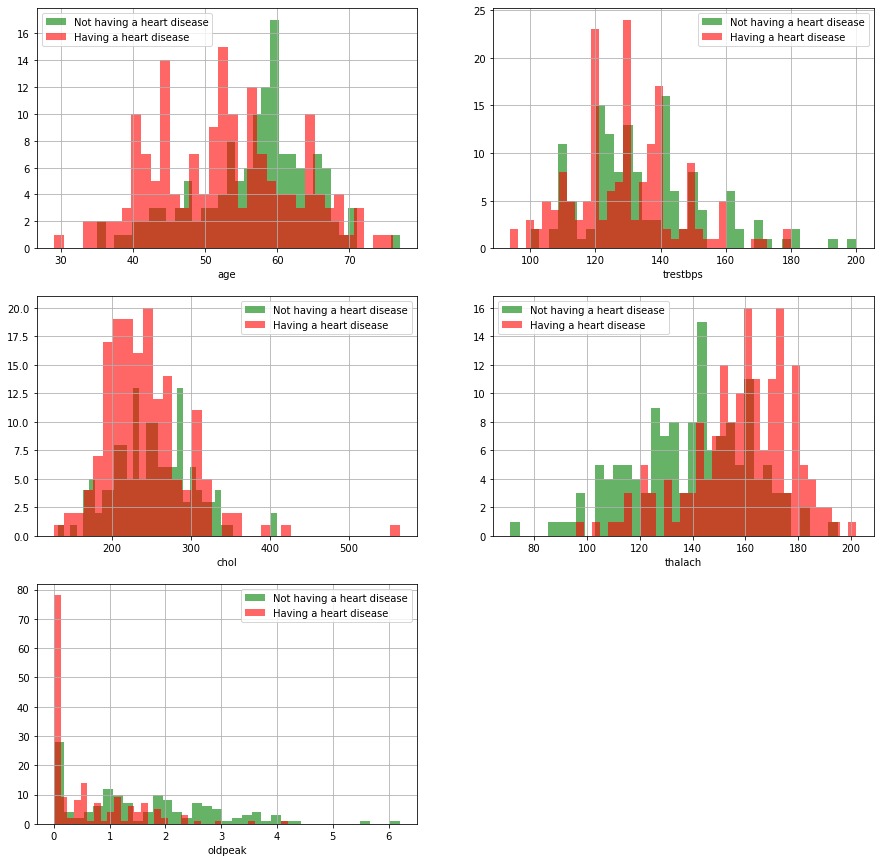

In [21]:
plt.figure(figsize = (15,15))

for i,column in enumerate(continous_values,1):
    plt.subplot(3,2,i)
    df[df["target"] == 0][column].hist(bins = 35, color = 'green', label = 'Not having a heart disease', 
                                       alpha = 0.6)
    df[df["target"] == 1][column].hist(bins = 35, color = 'red', label = 'Having a heart disease', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)



### Observations:

1. Resting blood pressure 120-130 is more likely have concerns about heart diseases.
2. Cholesterol bestween 200-300 have concerns about heart diseases. 
3. Thalach more than 160 is more likely have heart diseases.
4. Having old peak 0 is more likely have heart diseases.


In [24]:
print(df.age[df.target == 1])

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64


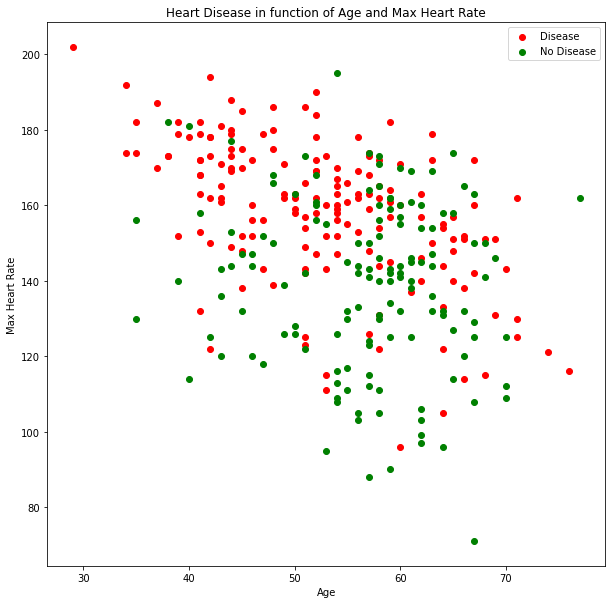

In [28]:
plt.figure(figsize = (10,10))

#having heart diseases
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target == 1],
           c="red")

#not having heart diseases
plt.scatter(df.age[df.target ==0],
            df.thalach[df.target == 0],
            c="green")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Correlation Matrix:

(14.5, -0.5)

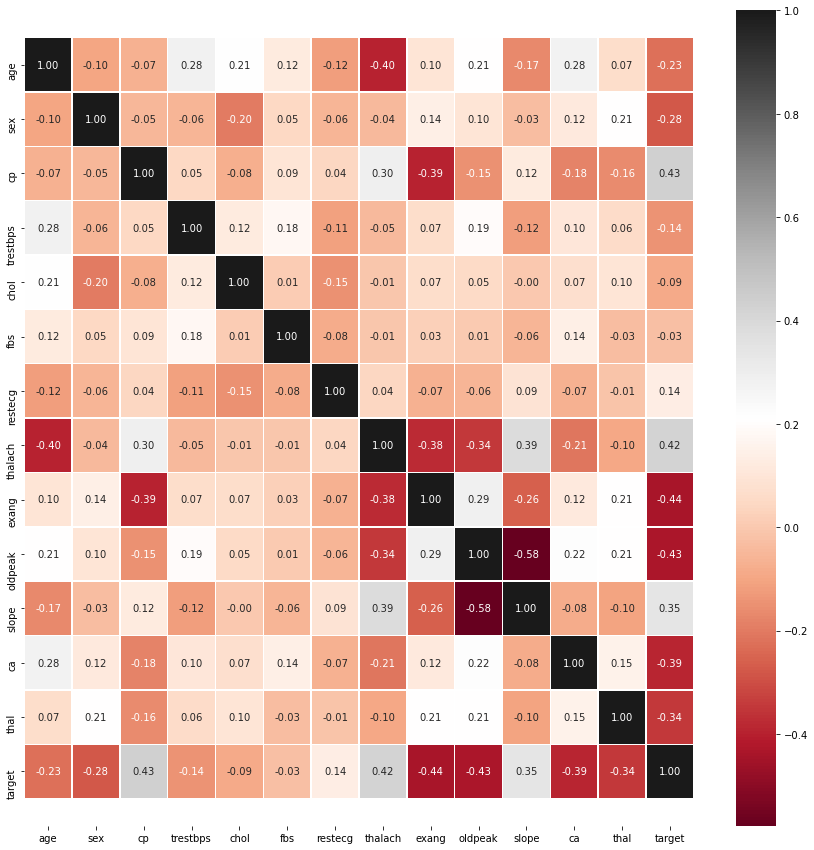

In [43]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "RdGy");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

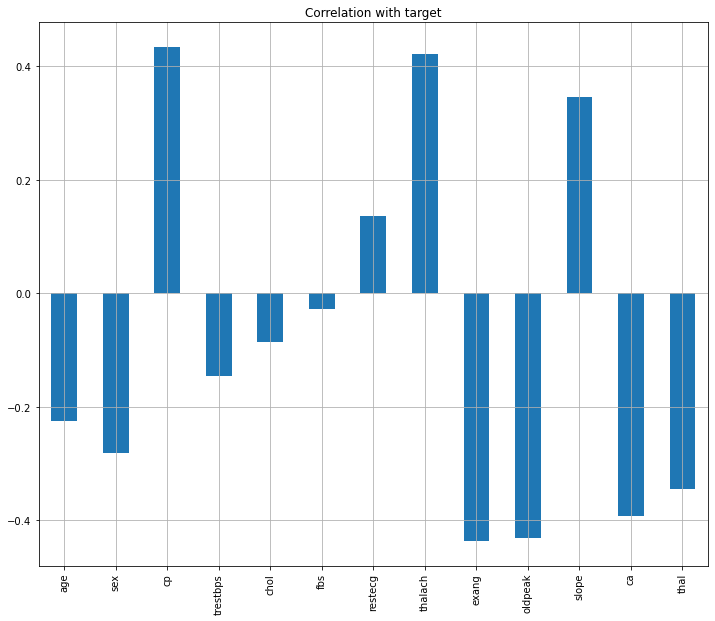

In [46]:
df.drop('target', axis = 1).corrwith(df.target).plot(kind='bar', grid = True, figsize = (12,10), 
                                                    title = 'Correlation with target')

## Data processing:

In [50]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [51]:
continous_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [54]:
#categorical_values.remove('target')

dataset = pd.get_dummies(df, columns = categorical_values)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ]

dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])


In [65]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.29,0.48,-0.10,-1.17,-0.72,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.03,-1.23,0.34,-0.77,0.14,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.50,0.71,-1.03,-0.38,2.04,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.29,-0.09,-2.23,-1.52,0.14,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


## Creating Report

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        prediction = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, prediction, output_dict = True))
        print("Train Result:\n-------------------")
        print(f"Accuracy Score: {accuracy_score(y_train, prediction)* 100:.2f}%")
        print("------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("------------------------")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train == False:
        prediction = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, prediction, output_dict = True))
        print("Test Result:\n-------------------")
        print(f"Accuracy Score: {accuracy_score(y_test, prediction)* 100:.2f}%")
        print("------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("------------------------")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, prediction)}\n")
        
        

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = dataset.drop('target', axis = 1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Model Creation

In [89]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print_score(LR, X_train, y_train, X_test, y_test, train=True)
print_score(LR, X_train, y_train, X_test, y_test, train=False)



Train Result:
-------------------
Accuracy Score: 86.79%
------------------------
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
------------------------
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
-------------------
Accuracy Score: 86.81%
------------------------
Classification Report:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
------------------------
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [90]:
test_score = accuracy_score(y_test, LR.predict(X_test)) * 100
train_score = accuracy_score(y_train, LR.predict(X_train)) * 100

results = pd.DataFrame(data = [["Logistic Regression", train_score, test_score]],
                      columns = ['Model', 'Training Accuracy %', 'Testing Accuracy'])

results

,Model,Training Accuracy %,Testing Accuracy
0,Logistic Regression,86.79,86.81
